## 2.1 Imports


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from pandas_profiling.utils.cache import cache_file

## 2.2 Load The  Forest Cover Type Data

In [2]:
covtype = pd.read_csv('../data/covtype.csv')


## 2.3 Explore The Data

### 2.3.1 Summary Of the Data

In [3]:
covtype.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                6279  ...            0            0   
1                                6225  ...            0            0   
2                                6121  ...            0            0   
3                                6211  ...            0            0   
4                                6172  ...            0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type39  Soil_Type40  Cover_Type  
0            0            0           5  
1            0            0           5  
2            0            0           2  
3            0            0           2  
4            0            0           5  

[5 rows x 55 columns]

In [4]:
covtype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

## 2.3.2 Target Value

In [5]:
covtype.Cover_Type.unique()

array([5, 2, 1, 7, 3, 6, 4])

There are seven forest cover types and are encoded by:

 * 1 --> Spruce/Fir 
 * 2 --> Lodgepole Pine 
 * 3 --> Ponderosa Pine
 * 4 --> Cottonwood/Willow
 * 5 --> Aspen
 * 6 --> Douglas-fir
 * 7 --> Krummholz


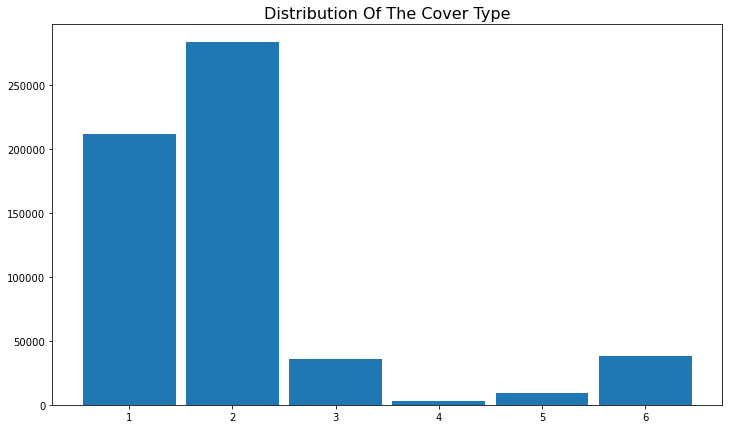

In [6]:
plt.figure(figsize=(12,7))
plt.hist(data = covtype,x = 'Cover_Type',bins = [1,2,3,4,5,6,7], align="left",rwidth=0.9)
plt.title("Distribution Of The Cover Type",fontsize  = 16)
plt.show()



In [7]:
#The proportion of each cover type in the data set
covtype['Cover_Type'].value_counts(normalize = True)

2    0.487599
1    0.364605
3    0.061537
7    0.035300
6    0.029891
5    0.016339
4    0.004728
Name: Cover_Type, dtype: float64

The results show that the number of the observations per cover type is not equally distributed.
Cover type 1 and cover type 2 account for the over 80% of the total observation and cover type 4 accounts for less than 0.4% of the total.

## 2.3.3 Explore Categorical Features

### 2.3.3.1 Wilderness Area

In [8]:
#percentage of each wildernss area in our data set
covtype.mean()[['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4']] * 100

Wilderness_Area1    44.886508
Wilderness_Area2     5.143439
Wilderness_Area3    43.607361
Wilderness_Area4     6.362691
dtype: float64

The wilderness areas are:
 * Wilderness_Area1 --> Rawah
 * Wilderness_Area2 --> Neota
 * Wilderness_Area3 --> Comanche Peak 
 * Wilderness_Area4 --> Cache la Poudre

Rawah and Comanche Peak acounts for 88% of our sample data!

In [9]:
def create_label(df,cate_name):   
    '''return a label list for the one hot encoding columns'''

    df = df.loc[:,df.columns[df.columns.str.contains(pat = cate_name + '.*')]] 
    Label = df.loc[:,df.columns != 'Cover_type'
                  ].apply(lambda row : row.index[row.argmax()], axis = 1)
    return Label

In [10]:
wild_cover_label = pd.DataFrame({'Wilderness_Area':create_label(covtype,'Wilderness_Area'),
                                 'Cover_Type':covtype.Cover_Type})
wild_cover_label.sample(10)

Wilderness_Area  Cover_Type
560283  Wilderness_Area3           1
465371  Wilderness_Area3           2
515369  Wilderness_Area2           1
93977   Wilderness_Area1           2
482923  Wilderness_Area3           2
30134   Wilderness_Area1           2
498633  Wilderness_Area3           1
386063  Wilderness_Area3           7
58866   Wilderness_Area1           2
565053  Wilderness_Area3           2

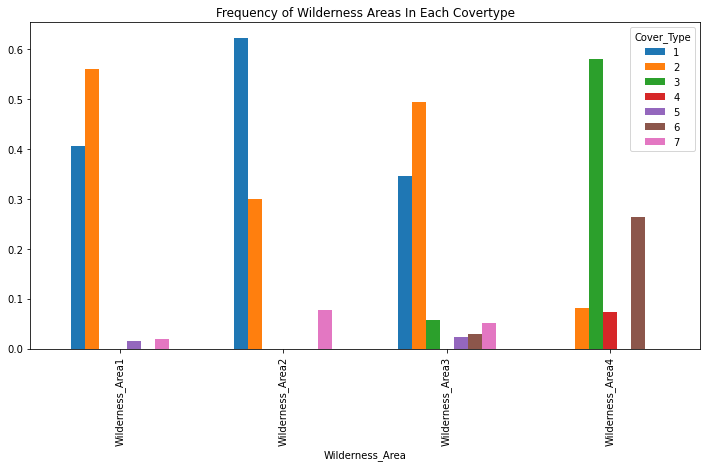

In [42]:
wild_cover_label.groupby(['Wilderness_Area'])['Cover_Type'] \
                                        .value_counts(normalize = True) \
                                        .unstack() \
                                        .plot \
                                        .bar(width = 0.6,figsize = (12,6),
                                             title ='Frequency of Wilderness Areas In Each Covertype')
plt.show()

There seems to be some class sperations across 4 wilderness areas.
We can see that the first two dominant cover types in wilderness area1, 2 and 3 are the same, which are Spruce Fir
and Lodgepole Pine. The first two dominant cover types in wilderness area4 are Ponderosa Pine and Douglas Fir.
Only Lodgepole Pine presents in all wilderness areas.
Overall, some wilderness areas favors certain forest cover types than others.



### 2.3.3.2 Soil Type

In [11]:
#percentage of each soil type area in our data set
soil_type_names = covtype.columns[covtype.columns.str.contains(pat =  'Soil_Type.*')]

In [12]:
covtype.mean()[soil_type_names].sort_values(ascending = False)

Soil_Type29    0.198356
Soil_Type23    0.099399
Soil_Type32    0.090392
Soil_Type33    0.077716
Soil_Type22    0.057439
Soil_Type10    0.056168
Soil_Type30    0.051927
Soil_Type12    0.051584
Soil_Type31    0.044175
Soil_Type24    0.036622
Soil_Type13    0.030001
Soil_Type38    0.026803
Soil_Type39    0.023762
Soil_Type11    0.021359
Soil_Type4     0.021335
Soil_Type20    0.015936
Soil_Type40    0.015060
Soil_Type2     0.012952
Soil_Type6     0.011316
Soil_Type3     0.008301
Soil_Type19    0.006921
Soil_Type17    0.005890
Soil_Type1     0.005217
Soil_Type16    0.004897
Soil_Type26    0.004456
Soil_Type18    0.003268
Soil_Type35    0.003255
Soil_Type34    0.002773
Soil_Type5     0.002749
Soil_Type9     0.001974
Soil_Type27    0.001869
Soil_Type28    0.001628
Soil_Type21    0.001442
Soil_Type14    0.001031
Soil_Type25    0.000816
Soil_Type37    0.000513
Soil_Type8     0.000308
Soil_Type36    0.000205
Soil_Type7     0.000181
Soil_Type15    0.000005
dtype: float64

In [13]:
#Create a dataframe that contains soil type and cover type only
soil_cover_label = pd.DataFrame({'Soil_Type':create_label(covtype,'Soil_Type'),
                                 'Cover_Type':covtype.Cover_Type})
soil_cover_label.sample(10)

Soil_Type  Cover_Type
225708  Soil_Type24           2
249873  Soil_Type17           2
220730  Soil_Type30           1
271393  Soil_Type22           1
529883  Soil_Type22           1
169529  Soil_Type30           1
365165  Soil_Type22           1
461768  Soil_Type22           1
226761  Soil_Type39           1
249153  Soil_Type33           2

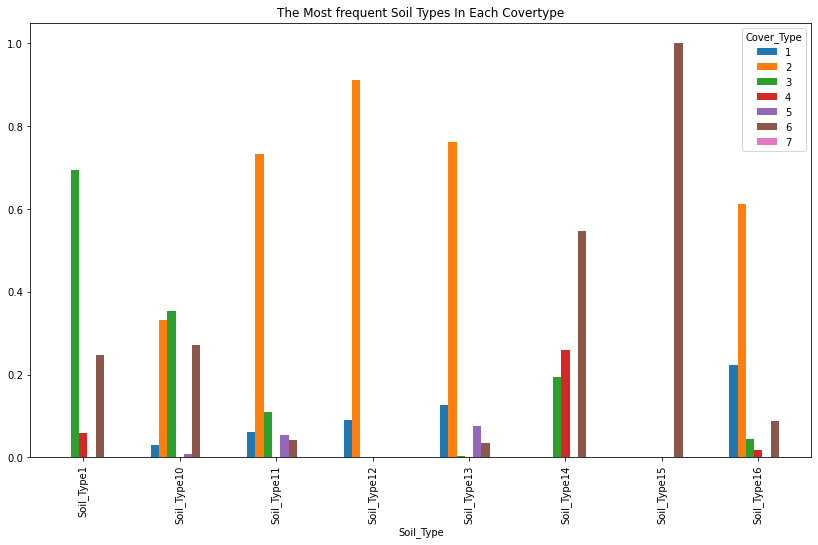

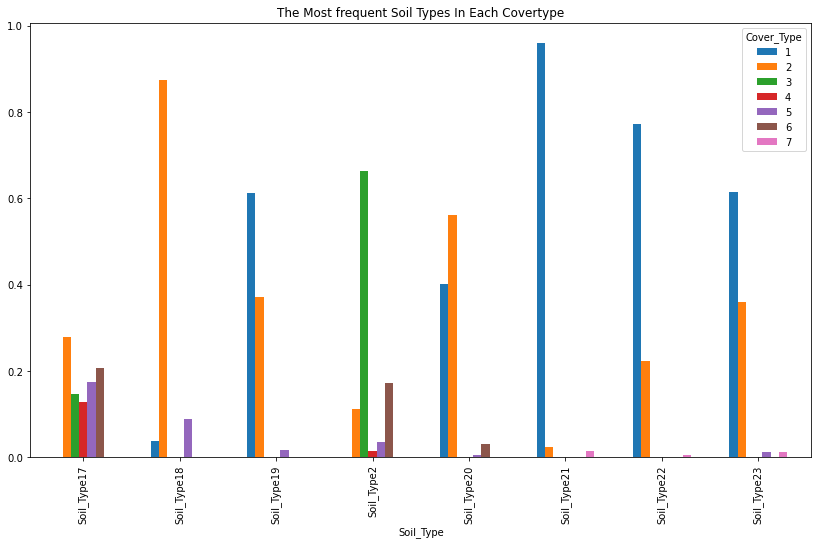

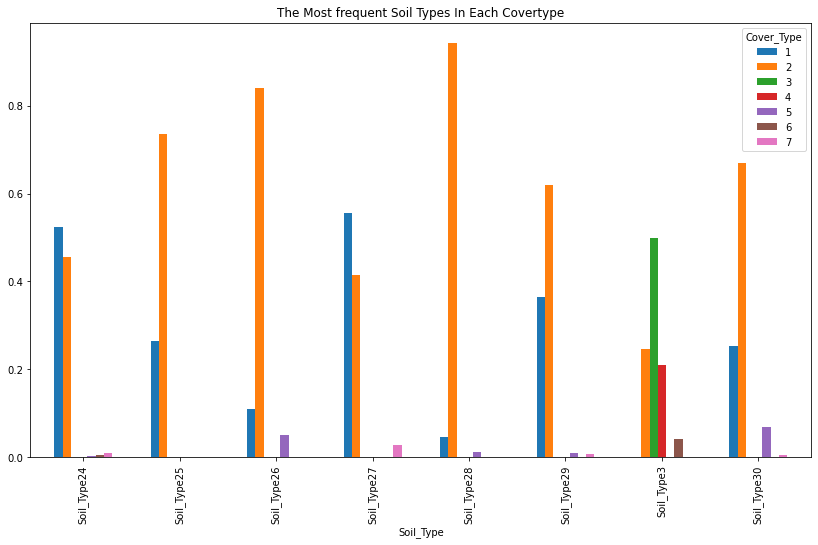

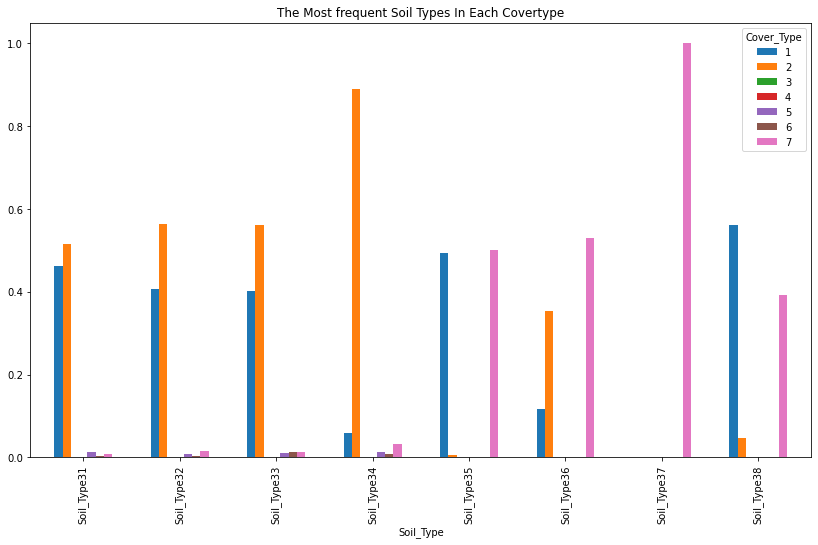

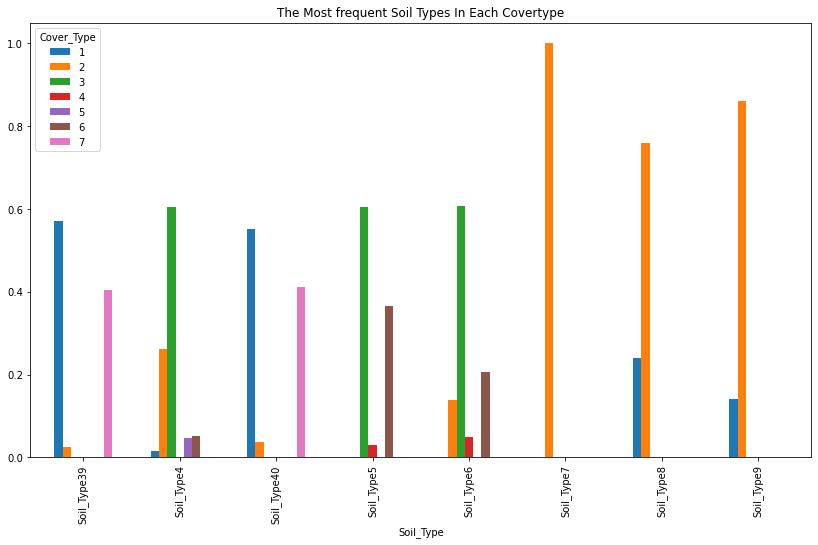

In [14]:

soil_cover_label_freq = soil_cover_label.groupby(['Soil_Type'])['Cover_Type']\
                                        .value_counts(normalize = True)\
                                        .groupby(level = [0]).nlargest()\
                                        .unstack().droplevel([0])

fig_num = int(len(soil_cover_label_freq) / 8)


for i in range(fig_num):
    soil_cover_label_freq.iloc[i*8: (i + 1)*8].plot.bar(width = 0.6,figsize = (14,8),
                                            title ='The Most frequent Soil Types In Each Covertype')
    


## 2.3.4 Correaltions Between Continuous Features

In [15]:
#extract continuous feautures only
con_features = covtype.loc[:,~covtype.columns.str.contains('Wilderness_Area|Soil_Type',regex=True)]

In [16]:
con_corr = con_features.corr()

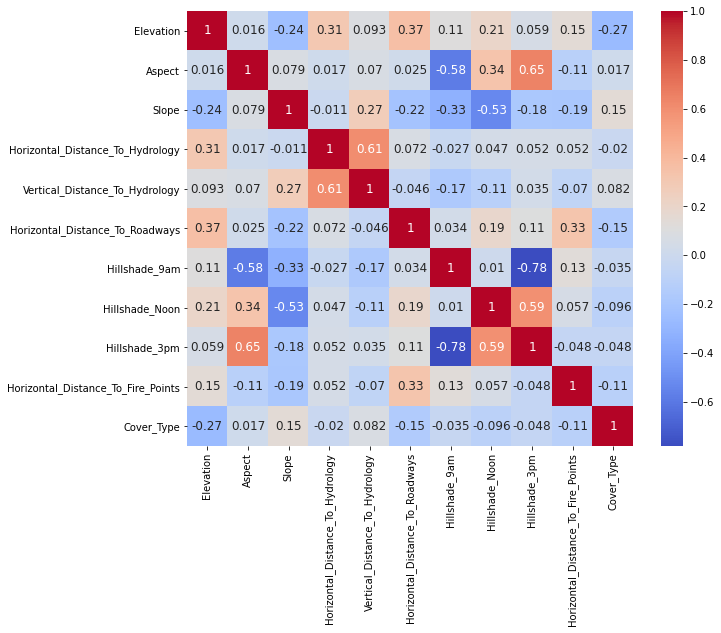

In [17]:
plt.figure(figsize=[10,8])
sns.heatmap(con_corr,cmap='coolwarm',annot= True,annot_kws = {'size': 12})

plt.show()

1. Hillshade_9pm has a strong negative correlation with Hillshade_3pm while Hillshade_noon has a postive correaltion with Hillshde_3pm.

2. Hillshde_9pm is a positively correalted to Aspect while Hillshde_noon is negatively correlated to Aspect.

3. Hillshde_noon is negatively correalated to slope.

4. Vertical Distance to Hydrology is postively correalated with Horizontal Distance to Hydrology.

From the first three points, we can see that the sunlight illumination of the patch is related to its terrain.

### 2.3.4.1 Hillshade Index and Cover Type

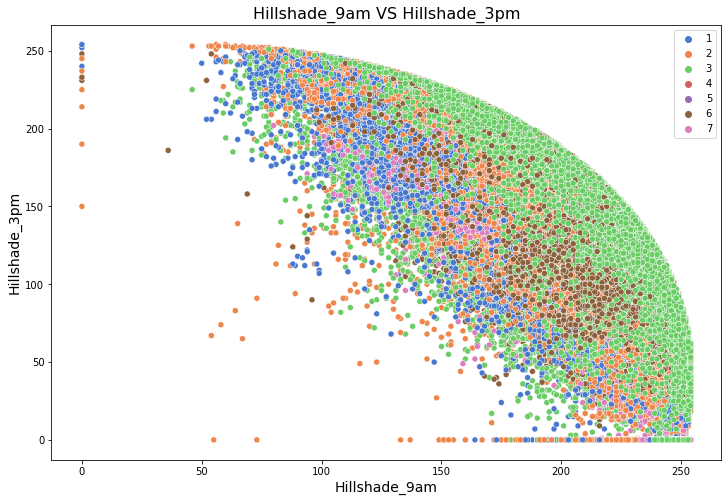

In [18]:
plt.figure(figsize = [12,8])

sns.scatterplot(data = covtype,x = 'Hillshade_9am',y= 'Hillshade_3pm', hue = 'Cover_Type',palette="muted")
plt.title('Hillshade_9am VS Hillshade_3pm',fontsize = 16)
plt.legend(loc="best")
plt.xlabel('Hillshade_9am',fontsize = 14)
plt.ylabel('Hillshade_3pm',fontsize = 14)

plt.show()

We can see that the results coherent with the pearson correlation. Higher hillshade index at 9am tends to has a lower hillshade index at 3pm. That is becasue the earth roation or the sun 'moving' from east to west.

Majority of the oberserved patches has the hillshade index greater than 50.
In addition,the oberserved patches belonging to cover_types3 Ponderosa Pine are mainly located at the outter edge of the scatter plot,indicating that Ponderosa Pine is very likely to require full sun and partical sun in order to thrive. Compared to cover_type3 Ponderosa Pine, cover_type1 Spruce/Fir and cover_type2 Douglas-fir are more tolerant of shade in general. 


#### Create Interation feature of Hillshade_9am and  Hillshade_3pm

In [19]:
covtype['interact_Hillshade_9am3pm'] = covtype.Hillshade_9am * covtype.Hillshade_3pm

\-------------------------------------------------------------------------------------------------------------------

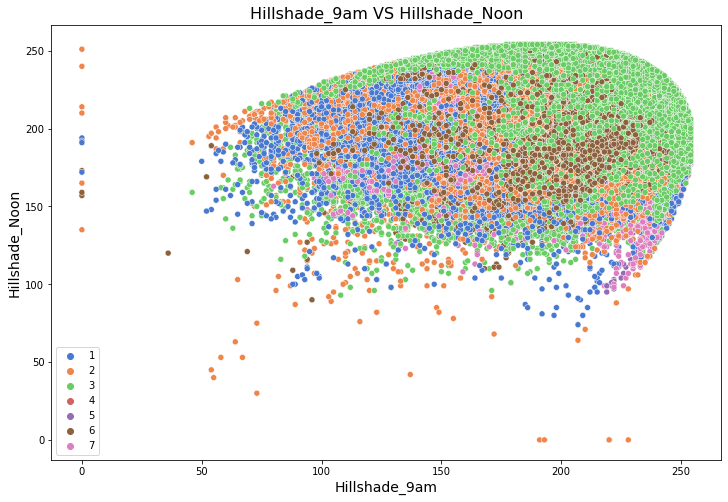

In [20]:
plt.figure(figsize = [12,8])

sns.scatterplot(data = covtype,x = 'Hillshade_9am',y= 'Hillshade_Noon',hue = 'Cover_Type',palette="muted")
plt.legend(loc="best")
plt.title('Hillshade_9am VS Hillshade_Noon',fontsize = 16)
plt.xlabel('Hillshade_9am',fontsize = 14)
plt.ylabel('Hillshade_Noon',fontsize = 14)

plt.show()

Hillshade_9am and hillshde_noon have a slight postive correaltion.

#### Create interation feature of Hillshade_9am and Hillshade_Noon

In [21]:
covtype['interact_Hillshade_9amNoon'] = covtype.Hillshade_9am * covtype.Hillshade_Noon

\-------------------------------------------------------------------------------------------------------------------


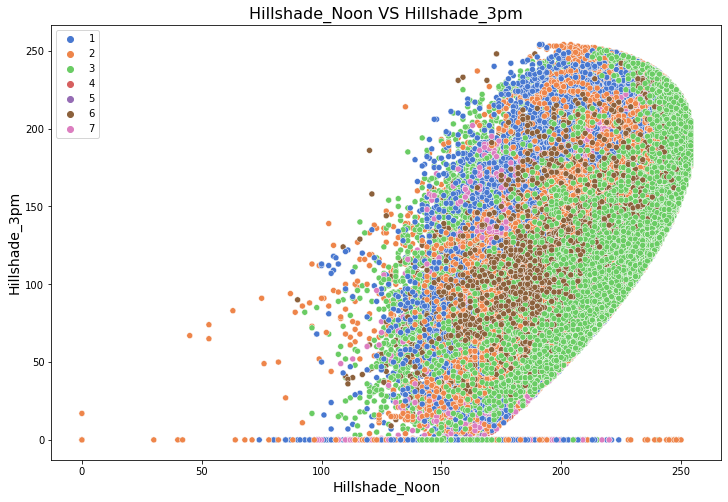

In [22]:
plt.figure(figsize = [12,8])

sns.scatterplot(data = covtype,x = 'Hillshade_Noon',y= 'Hillshade_3pm', hue = 'Cover_Type',palette="muted")
plt.legend(loc="best")
plt.title('Hillshade_Noon VS Hillshade_3pm',fontsize = 16)
plt.xlabel('Hillshade_Noon',fontsize = 14)
plt.ylabel('Hillshade_3pm',fontsize = 14)

plt.show()

Hillshade_Noon and hillshde_3pm have a strong postive correaltion. 
Majority of the pathces has abundance of sunlight at noon with hillshde_noon index greater than 100. 


#### Create interation feature of Hillshade_3am and Hillshade_Noon

In [23]:
covtype['interact_Hillshade_3pmNoon'] = covtype.Hillshade_3pm * covtype.Hillshade_Noon

\-------------------------------------------------------------------------------------------------------------------


#### Explpore Suspicious Outliers

In the scatter plots of *Hillshade_Noon VS Hillshade_3pm*, some noticable outliers are at the bottom, where hillshade index at 3pm is 0. Let's find out where these patches are located and what kind of factors impact on the hillshade index.

In [24]:
#Extract observations  with 0 hillshade index at 3pm.
covtype.loc[covtype.Hillshade_3pm == 0,:][['Elevation','Aspect','Slope']]

Elevation  Aspect  Slope
1375         2806      76     39
1411         2773      80     48
1416         2779      78     47
1419         2786      76     46
1423         2743      76     49
...           ...     ...    ...
579590       2492      82     36
579634       2495      79     35
579682       2499      76     32
580713       2570     109     39
580714       2544     124     29

[1338 rows x 3 columns]

In [25]:
# Summary Geographical Condition of the pathces with 0 hillshade at 3pm
covtype.loc[covtype.Hillshade_3pm == 0,:][['Elevation','Aspect','Slope']].describe()


Elevation       Aspect        Slope
count  1338.000000  1338.000000  1338.000000
mean   2904.490284    87.805680    35.443946
std     412.046875    30.379198     8.512400
min    1906.000000     1.000000     1.000000
25%    2727.000000    72.000000    31.000000
50%    3000.500000    86.000000    36.000000
75%    3228.750000    97.000000    40.000000
max    3472.000000   356.000000    66.000000

In [26]:
# Let's compare to the overall Geographical Condition of all pathces.
covtype[['Elevation','Aspect','Slope']].describe()


Elevation         Aspect          Slope
count  581012.000000  581012.000000  581012.000000
mean     2959.365301     155.656807      14.103704
std       279.984734     111.913721       7.488242
min      1859.000000       0.000000       0.000000
25%      2809.000000      58.000000       9.000000
50%      2996.000000     127.000000      13.000000
75%      3163.000000     260.000000      18.000000
max      3858.000000     360.000000      66.000000

Comparing the two tables above, we can see that the factor of elevation seems has less impact on the hillshade inex but aspect and slope seem to be strongly relative to the hillshade index. 

For pathces with 0 hillshde inex at 3pm, the 25th and the 75th percentile aspect are 72 and 97 degrees respectively, indicating that majority of the pathes gets the sunlight from eastly direction (an object due north has an azimuth of 0°, one due east 90°, south 180° and west 270°). Besides, the slope of these patches on average is much steeper than  that of the overall pathes. These information suggest that patches on steeper slope and facing the eastly direction will recieve less sunlight in the afternoon.

### 2.3.4.2 Distance_To_Hydrology and Cover Type

#### Vertical and Horizontal  Distance to Hydrology

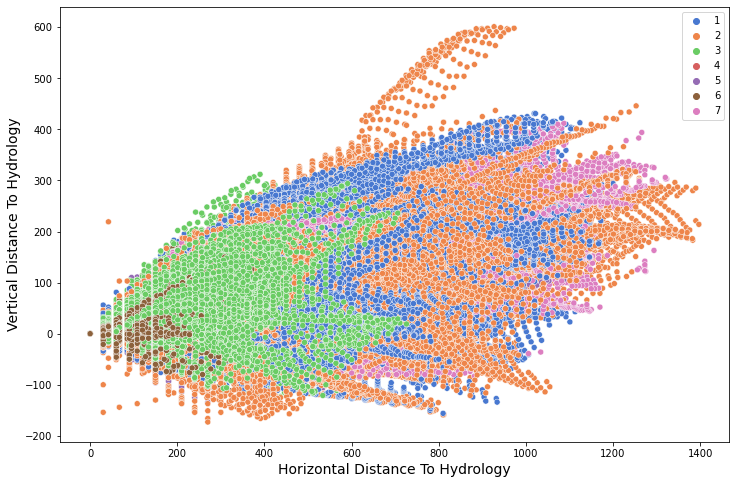

In [27]:
plt.figure(figsize = [12,8])

sns.scatterplot(data = covtype,x = 'Horizontal_Distance_To_Hydrology',y= 'Vertical_Distance_To_Hydrology', hue = 'Cover_Type',palette="muted")
plt.legend(loc="best")
plt.xlabel('Horizontal Distance To Hydrology',fontsize = 14)
plt.ylabel('Vertical Distance To Hydrology',fontsize = 14)

plt.show()

The scatters plots shows some seperations of class. Cover_type7 seems to be further from water comparing to the other cover types while Cover_type4 Cottonwood/Willow and Cover_type6 Douglas-fir seems to be closer to water. But many points are overlapping here, it may be good to look at the distributons of the euclidean distance to water.


####  Create Euclidean distance to Hydrology

In [28]:
#Add feature Euclidean Dist
Euclidean_Dist = np.sqrt(covtype.Horizontal_Distance_To_Hydrology ** 2  + covtype.Vertical_Distance_To_Hydrology ** 2)

In [29]:
Euclidean_Dist.groupby(covtype.Cover_Type).describe()

count        mean         std  min         25%         50%  \
Cover_Type                                                                  
1           211840.0  276.000490  221.316400  0.0   95.189285  223.394270   
2           283301.0  286.236737  214.656456  0.0  124.016128  242.668498   
3            35754.0  222.952252  148.653770  0.0   98.493655  200.569190   
4             2747.0  116.135370  150.524354  0.0    0.000000   31.048349   
5             9493.0  221.820826  184.379449  0.0   85.842880  182.945347   
6            17367.0  168.376633  130.277014  0.0   62.096699  142.337627   
7            20510.0  366.546052  302.286419  0.0  121.342490  291.773028   

                   75%          max  
Cover_Type                           
1           406.601771  1235.490186  
2           401.995025  1418.916840  
3           323.382899   748.503841  
4           220.808594   599.770790  
5           313.383152  1123.178080  
6           254.134801   651.115965  
7           540.737228  1357.253845

<Figure size 864x576 with 0 Axes>

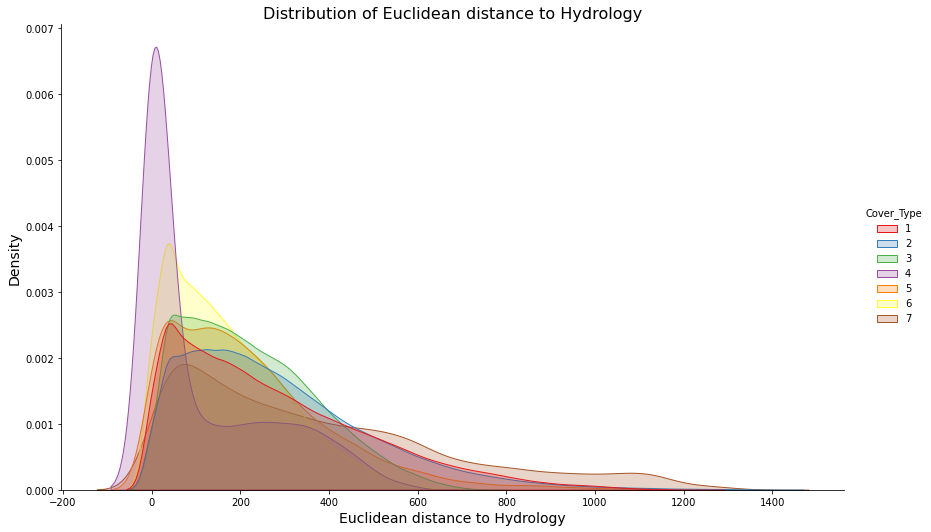

In [30]:
plt.figure(figsize = [12,8])

sns.displot(x=Euclidean_Dist, hue= covtype.Cover_Type, kind="kde",
            fill = True, palette = 'Set1',common_norm=False,
            height=7, aspect=12/7)

plt.title('Distribution of Euclidean distance to Hydrology',fontsize = 16)
plt.xlabel('Euclidean distance to Hydrology',fontsize = 14)
plt.ylabel('Density',fontsize = 14)

plt.show()

All the distributions are right skewed,but strong veriaties still present among them. 
Cover_type4 Cottonwood Willow shows a sronger need for water,and its peak is significant higher than others. 
Cover_type 7 Krummholz may be more drought enduring due to its wider spread. 
Over all, all cover types are water-loving plants because their peaks are located between 0 - 200 meters from the water source.

In [31]:
#Add feature Euclidean_Dist to our dataset.
covtype['Euclidean_Distance_To_Hydrology'] = Euclidean_Dist

### 2.3.4.3 Elevation and Cover Type

<Figure size 864x576 with 0 Axes>

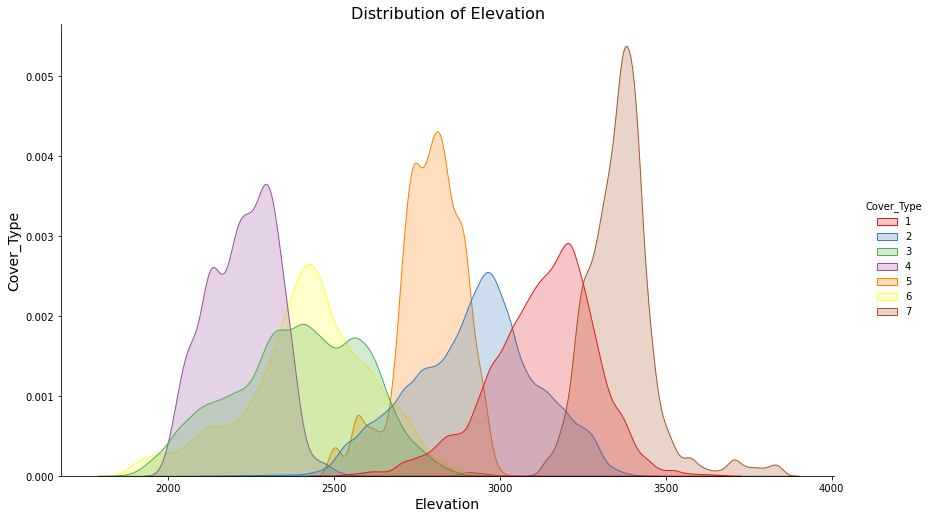

In [32]:
#Distributon of elevation across each cover type
plt.figure(figsize = [12,8])

sns.displot(data = covtype,x= 'Elevation', hue= 'Cover_Type', kind="kde",
            fill = True, palette = 'Set1',common_norm=False,
            height=7, aspect=12/7)

plt.title('Distribution of Elevation',fontsize = 16)
plt.xlabel('Elevation',fontsize = 14)
plt.ylabel('Cover_Type',fontsize = 14)

plt.show()

The distrition of the elevation for each cover type significantly distinct from others and the ranges are varying as well! Cover_type7 Krummholz is spreading at the higest elevation overall, followed by Cover_type1 Spruce/Fir and Cover_type2 Lodgepole Pine. Cover_type4 Cottonwood Willow is spreding at the lowest elevation. Cover types that are spreading at higher elevation may imply the charateristic of cold tolerance,vice versa. 

Now,we have found that elevation or temperature is associated with cover type. Let's find out if there is an interation of sunlight illumination (slope and aspect) and elevation relative to cover type. 

#### Is There An Interation Between Sunlight  Illumination And Temperature?

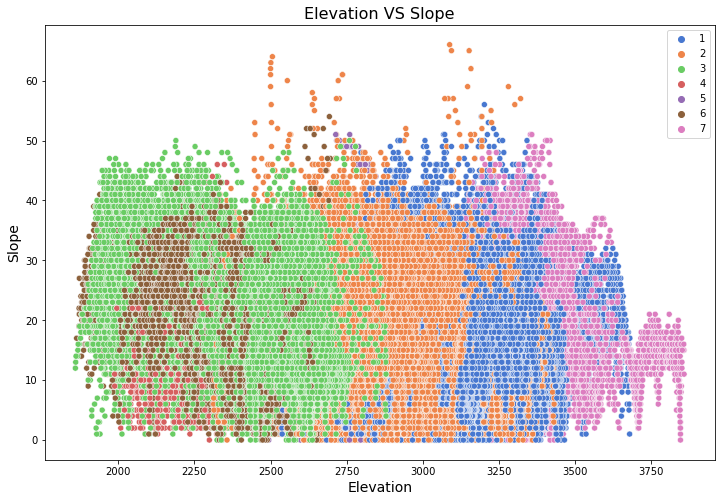

In [33]:
plt.figure(figsize = [12,8])

sns.scatterplot(data = covtype,x = 'Elevation', y = 'Slope',hue = 'Cover_Type',palette="muted")
plt.legend(loc="best")
plt.xlabel('Elevation',fontsize = 14)
plt.ylabel('Slope',fontsize = 14)
plt.title('Elevation VS Slope',fontsize = 16)

plt.show()

Seems that the slope does not affect the covertype because each covertype spread across the the bottom to the top. Though, we can still see a strong corration between elevation and covertype.

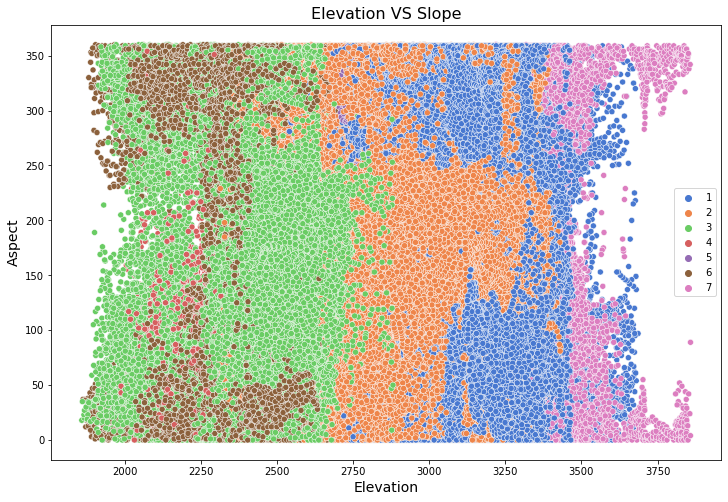

In [34]:
plt.figure(figsize = [12,8])

sns.scatterplot(data = covtype,x = 'Elevation', y = 'Aspect',hue = 'Cover_Type',palette="muted")
plt.legend(loc="best")
plt.xlabel('Elevation',fontsize = 14)
plt.ylabel('Aspect',fontsize = 14)
plt.title('Elevation VS Slope',fontsize = 16)

plt.show()

As well,no strong signals indicate that the interation between elevationa aspect has an impact on covertype.

### 2.3.4.4  Horizontal_Distance_To_Fire_Points  and Cover Type

<Figure size 864x576 with 0 Axes>

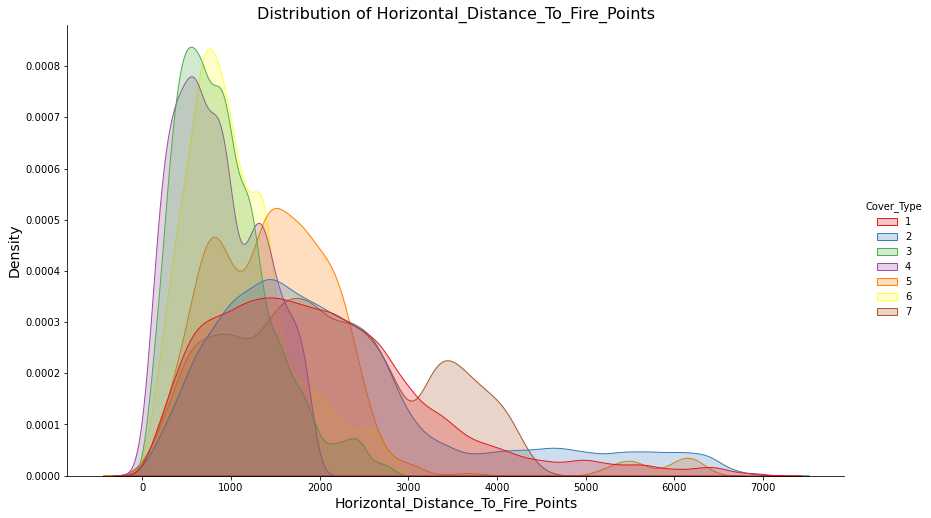

In [35]:
plt.figure(figsize = [12,8])

sns.displot(data = covtype,x= 'Horizontal_Distance_To_Fire_Points', hue= 'Cover_Type', kind="kde",
            fill = True, palette = 'Set1',common_norm=False,
            height=7, aspect=12/7)

plt.title('Distribution of Horizontal_Distance_To_Fire_Points',fontsize = 16)
plt.xlabel('Horizontal_Distance_To_Fire_Points',fontsize = 14)
plt.ylabel('Density',fontsize = 14)

plt.show()

The distributuons of Cover_type3, Cover_type4 and Cover_type6 are very simlilar with mean slightly under 1000 meters and narrower ranges. At the same time, Cover_type1,Cover_type2 and Cover_type7 have wider spreading and greater mean horizontal distance to fire points. 

It's interesting that Cover_type3, Cover_type4 and Cover_type6 closer to fire point are actually spreading at lower elevation while Cover_type1,Cover_type2 and Cover_type7 further form fire point are spreading at the higher elevation, from what we observed above. Does this imply wildfire occur more frequently at lower elvation? Does it associated with human activities?

Now it's time to explore the feature Horizontal_Distance_To_Roadways!

### 2.3.4.5   Horizontal_Distance_To_Roadways and Cover Type

In [36]:
# Get mean of Horizontal_Distance_To_Roadways and Horizontal_Distance_To_Fire_Points for each cover type
Mean_Distance_Fire_Roadways = covtype.groupby('Cover_Type')[['Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points']
                                                           ].agg([np.mean,np.std])
Mean_Distance_Fire_Roadways.reset_index(level=0, inplace=True)

In [37]:
Mean_Distance_Fire_Roadways

Cover_Type Horizontal_Distance_To_Roadways               \
                                        mean          std   
0          1                     2614.834517  1497.907501   
1          2                     2429.530799  1618.718859   
2          3                      943.940734   614.681991   
3          4                      914.199490   366.290139   
4          5                     1349.765722  1044.690988   
5          6                     1037.169805   570.571139   
6          7                     2738.250463  1200.589081   

  Horizontal_Distance_To_Fire_Points               
                                mean          std  
0                        2009.253517  1234.823898  
1                        2168.154849  1424.315110  
2                         910.955949   527.109484  
3                         859.124135   480.861801  
4                        1577.719794   995.611463  
5                        1055.351471   576.374422  
6                        2070.031594  1087.258556

The Horizontal_Distance_To_Roadways certainly is relative to Horizontal_Distance_To_Fire_Points. As we see,
the means and stds of distance to Horizontal_Distance_To_Roadways are actually close to the ones of Horizontal_Distance_To_Fire_Points. But since the pearson correlation between them is around 0.33, it's better to keep both features at this momemt. 

Still, the results shows that the occurrence of wildfire is very likely caused by human activity. Therefore, it is inevitable that the forest not suffers from human interference.

## 2.4 Summary

The most important thing we found so far is that the soil type, sunlight illumination,water source,elevation and human activity are associated with the cover type. In each soil type, the dominant cover types are varing form others. Different soil type provides different nutrients,so some cover types may present growth advantge or disavantage under a certain soil type. Likewise, we found that all cover types exhibit varying degrees of tolerance to shade,drought and coldness. 

Next step,we are going to address the probelm of imbalanced cover types and pre-processing data so that our fulture trained classifer is not biased towards the majority class.


#### Helper Function

In [1]:
def create_label(df,feature_name):   
    '''return a label list for the one hot encoding columns'''

    df = df.loc[:,df.columns[df.columns.str.contains(pat = feature_name + '.*')]] 
    Label = df.loc[:,df.columns != 'Cover_type'
                  ].apply(lambda row : row.index[row.argmax()], axis = 1)
    return Label
    

<br />

In [39]:
# Updated columns
covtype.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [40]:
#Save file to local
datapath = '../data/'
covtype.to_csv(datapath + 'covtype_step3_features.csv',index=False)